In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [4]:
nasdaq = load_data_set("nasdaq100_30spy_30shift_original")

In [31]:
resistance_indicators = ["horizontal_upper20", "horizontal_upper50", "horizontal_upper100", 
                         "horizontal_lower20", "horizontal_lower50", "horizontal_lower100"]

In [76]:

def plot_number_distribution(indicators, digit, bins=100):
    # map the prices to a digit (digit=0 -> last digit, digit=1 -> second last digit)
    fractionals = pd.DataFrame(np.modf(indicators * 10**-digit)[0])
    # plot the distribution of the digits
    for indicator in indicators:
        plt.title(indicator)
        plt.hist(fractionals[indicator], bins=bins, density=True)
        sns.kdeplot(fractionals[indicator], cut=0, bw_method=0.02)
        plt.show()

# Distribution oft digits
Using a histogram and kernel density estimation, anomalities regarding the density distribution of the price digits can be seen. The digits of prices are approximately evently distributed. Only the first bin (0 to 0.01) has significantly more records. This is especially the case for the custom implementation of a support line (e. g. horizontal_lower50), but the density distribution is still very close to the distribution of the price data.

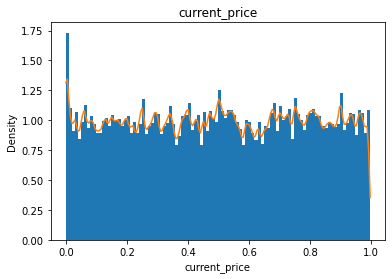

In [78]:
plot_number_distribution(nasdaq[["current_price"]], 0)

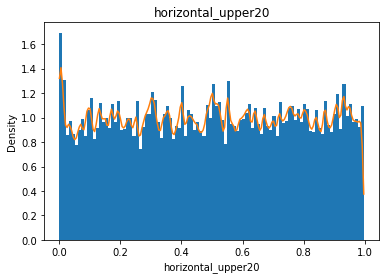

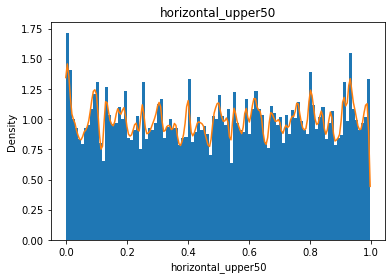

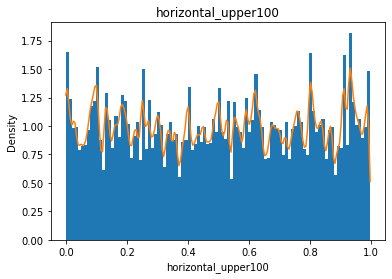

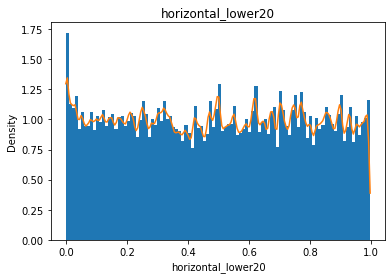

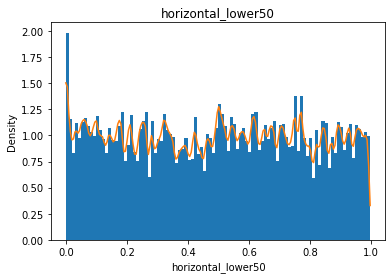

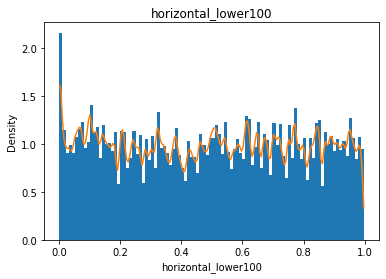

In [77]:
plot_number_distribution(nasdaq[resistance_indicators], 0)